**MEMBUAT DECESION TREE**


*   NAMA : SONI AGUNG W
*   KELAS : IE 22 C1
*   NIM : 352210008

*Library : sckit-Sklearn, numpy,pandas,matplotlib*



In [27]:
# Import library dulu gess
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [12]:
#Baca Data dan buat Dataframe dulu
data = {
    'Outlook': ['sunny','sunny','sunny','sunny','sunny',
                'rainy','rainy','rainy','rainy','rainy'],
    'Company': ['big','med','med','no','big',
                'no','med','big','no','med'],
    'Sailboat': ['small','small','big','small','big',
                 'small','small','big','big','big'],
    'Sail': ['yes','yes','yes','yes','yes',
             'no','yes','yes','no','no']
}

data_iki = pd.DataFrame(data)

In [3]:
#cek hasil data dulu
data_iki

,Outlook,Company,Sailboat,Sail
0,sunny,big,small,yes
1,sunny,med,small,yes
2,sunny,med,big,yes
3,sunny,no,small,yes
4,sunny,big,big,yes
5,rainy,no,small,no
6,rainy,med,small,yes
7,rainy,big,big,yes
8,rainy,no,big,no
9,rainy,med,big,no


In [16]:
#membuat encoding atau numerical dari text yang di import datanya agar bisa dilakukan training , bukan training gym ya hahaha...

encoders = {}
df_encoded = data_iki.copy()

for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le
#buat train modellll
X = df_encoded[['Outlook','Company','Sailboat']]
y = df_encoded['Sail']

#import model
model = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0
)
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Cek data hasil training menggunkan DTC apa kui lah...
df_encoded

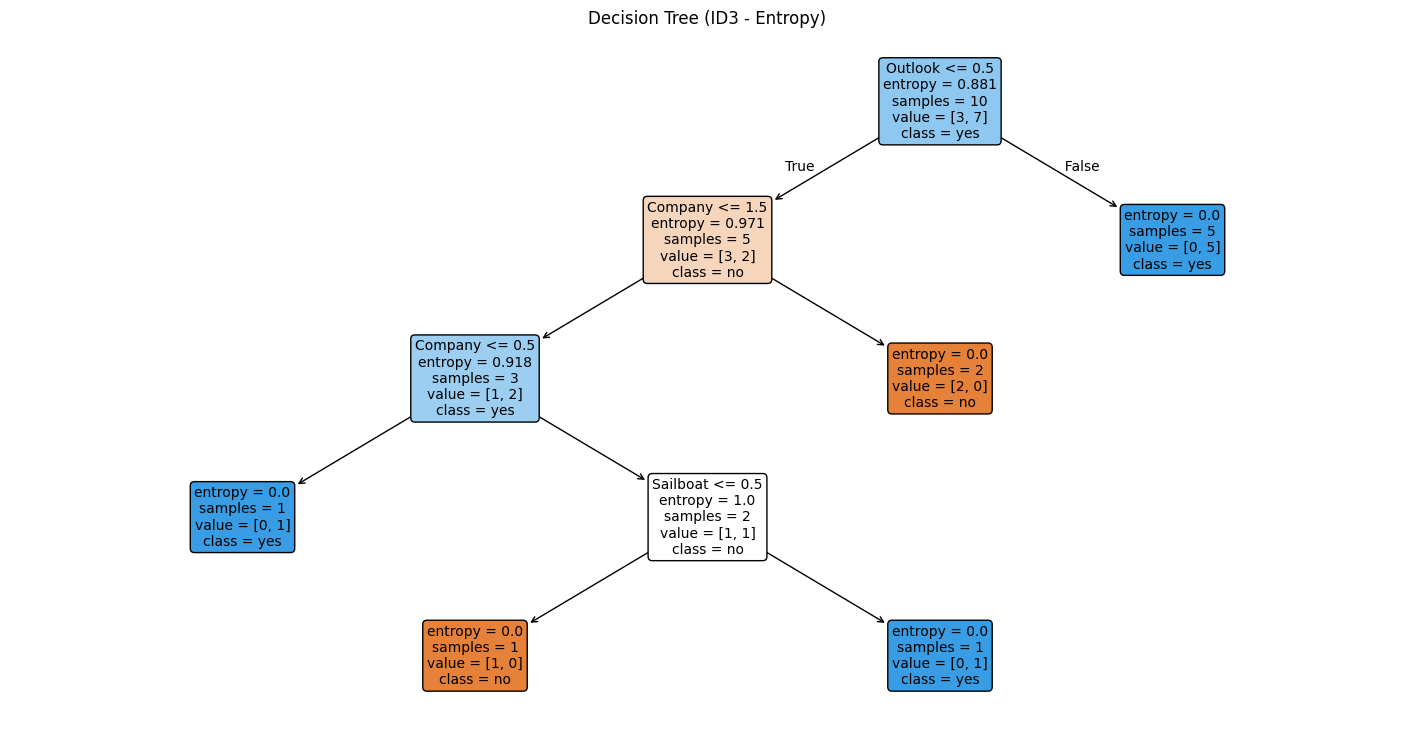


Outlook mapping:
  0 = rainy
  1 = sunny

Company mapping:
  0 = big
  1 = med
  2 = no

Sailboat mapping:
  0 = big
  1 = small

Sail mapping:
  0 = no
  1 = yes


In [17]:
#buat plot hasil decesion tree training pakai matplotlib, pakai seaborn terlalu keren pakai ini aja udah...

plt.figure(figsize=(18, 9))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=encoders['Sail'].classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (ID3 - Entropy)")
plt.show()

#keterangan
for col in ['Outlook', 'Company', 'Sailboat', 'Sail']:
    print(f"\n{col} mapping:")
    for i, v in enumerate(encoders[col].classes_):
        print(f"  {i} = {v}")


In [31]:
def predict_value(outlook, company, sailboat):
    # ===============================
    # 1. ENCODING INPUT
    # ===============================
    encoded_outlook = encoders['Outlook'].transform([outlook])[0]
    encoded_company = encoders['Company'].transform([company])[0]
    encoded_sailboat = encoders['Sailboat'].transform([sailboat])[0]

    df_encoded = pd.DataFrame({
        'Fitur': ['Outlook', 'Company', 'Sailboat'],
        'Input Asli': [outlook, company, sailboat],
        'Nilai Encoded': [encoded_outlook, encoded_company, encoded_sailboat]
    })

    # ===============================
    # 2. X_test (DATA UJI)
    # ===============================
    X_test = pd.DataFrame({
        'Outlook': [encoded_outlook],
        'Company': [encoded_company],
        'Sailboat': [encoded_sailboat]
    })

    # ===============================
    # 3. y_test (PREDIKSI)
    # ===============================
    y_test = model.predict(X_test)
    y_label = encoders['Sail'].inverse_transform(y_test)

    df_result = X_test.copy()
    df_result['Sail (encoded)'] = y_test
    df_result['Sail (label)'] = y_label

    # ===============================
    # 4. TAMPILKAN SEMUA
    # ===============================
    print("📌 HASIL ENCODING")
    display(df_encoded)

    print("\n📌 X_test (data uji ke model)")
    display(X_test)

    print("\n📌 y_test & HASIL AKHIR")
    display(df_result)

    return df_encoded, X_test, y_test, y_label

In [39]:
#kalo masih bingung ini data yang diolah dari pecahan diatas gessss:
#encode : membuat numerical misal (yes=1 dan no=0) kieee.
#X_train,Y_train membuat data latih dari hasil encoded dengan mencoba test 3 data..
#mengimport model decesion tree, lalu masukin data latih tadi.

data = data_iki.copy()

# Encode semua kolom kategori
encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

print("\nData setelah encode:")
print(data)

# Fitur dan label dari data yang sudah di-encode
X = data[['Outlook', 'Company', 'Sailboat']]
y = data['Sail']

# Bagi data latih & uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Gabungkan hasil dengan data asli
result = X_test.copy()
result['y_test (ASLI)'] = y_test.values
result['y_pred (PREDIKSI)'] = y_pred

# Kembalikan label asli
for col in ['Outlook', 'Company', 'Sailboat']:
    result[col] = encoders[col].inverse_transform(result[col])

result['y_test (ASLI)'] = encoders['Sail'].inverse_transform(result['y_test (ASLI)'])
result['y_pred (PREDIKSI)'] = encoders['Sail'].inverse_transform(result['y_pred (PREDIKSI)'])

print("\nHasil data olah:")
print(result)




Data setelah encode:
   Outlook  Company  Sailboat  Sail
0        1        0         1     1
1        1        1         1     1
2        1        1         0     1
3        1        2         1     1
4        1        0         0     1
5        0        2         1     0
6        0        1         1     1
7        0        0         0     1
8        0        2         0     0
9        0        1         0     0

Hasil data olah:
  Outlook Company Sailboat y_test (ASLI) y_pred (PREDIKSI)
8   rainy      no      big            no                no
1   sunny     med    small           yes               yes
5   rainy      no    small            no               yes


In [44]:
#buat pakai dropdown biar mudah, pakai chat gpt minta buatin dah....
outlook_dd = widgets.Dropdown(
    options=encoders['Outlook'].classes_.tolist(),
    description='Outlook:'
)
company_dd = widgets.Dropdown(
    options=encoders['Company'].classes_.tolist(),
    description='Company:'
)
sailboat_dd = widgets.Dropdown(
    options=encoders['Sailboat'].classes_.tolist(),
    description='Sailboat:'
)

# Tombol Predict
button = widgets.Button(
    description='Predict',
    button_style='success'
)

output = widgets.Output()

# Fungsi prediksi
def on_predict_clicked(b):
    with output:
        clear_output()

        # Encode input
        test_encoded = pd.DataFrame({
            'Outlook': [encoders['Outlook'].transform([outlook_dd.value])[0]],
            'Company': [encoders['Company'].transform([company_dd.value])[0]],
            'Sailboat': [encoders['Sailboat'].transform([sailboat_dd.value])[0]]
        })

        # Prediksi
        pred = model.predict(test_encoded)
        pred_label = encoders['Sail'].inverse_transform(pred)

        # Tampilkan angka encode + label asli
        display_df = test_encoded.copy()
        display_df['Outlook_label'] = outlook_dd.value
        display_df['Company_label'] = company_dd.value
        display_df['Sailboat_label'] = sailboat_dd.value
        display_df['Prediksi (label)'] = pred_label[0]

        print("Input & Prediksi:")
        print(display_df)

button.on_click(on_predict_clicked)

# Tampilkan widget
display(outlook_dd, company_dd, sailboat_dd, button, output)

Dropdown(description='Outlook:', options=('rainy', 'sunny'), value='rainy')

Dropdown(description='Company:', options=('big', 'med', 'no'), value='big')

Dropdown(description='Sailboat:', options=('big', 'small'), value='big')

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()